In [173]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import stde

In [174]:
df_info = pd.read_csv('../dataset_clean/options_csv_v1_etl.csv')
df_info

,generic_features,remove_atypical_values,feature_combination,remove_feature_selection,remove_time_features,remove_invalid_correlated_features
0,False,False,False,Lasso,True,False


In [175]:
df = pd.read_csv('../dataset_clean/PlatteRiverWeir_features_v1_clean.csv')
df

,Stage,Discharge,grayMean,graySigma,entropyMean,hMean,hSigma,grayMean0,hMean0,entropyMean1,entropySigma1,hMean1,WwRawLineMean,WwRawLineSigma,WwCurveLineMean,WwCurveLineSigma
0,2.99,916.0,97.405096,39.623303,0.203417,105.368375,41.572939,97.084576,106.047217,0.092532,0.632319,169.963345,0.000000,0.000000,0.000000,0.000000
1,2.99,916.0,104.066757,40.179745,0.206835,112.399458,41.795584,105.668610,114.886049,0.090279,0.620077,175.220945,0.000000,0.000000,0.000000,0.000000
2,2.96,873.0,105.636831,40.533218,0.204756,114.021526,42.145582,106.786307,116.053131,0.090561,0.620853,179.554842,0.000000,0.000000,0.000000,0.000000
3,2.94,846.0,104.418949,41.752678,0.202428,112.612830,43.575351,107.674299,117.005027,0.095616,0.651642,180.921521,0.000000,0.000000,0.000000,0.000000
4,2.94,846.0,106.763541,44.442097,0.202661,114.839424,46.302008,114.858589,124.519271,0.101601,0.688024,183.131779,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2.54,434.0,82.872720,57.702652,0.221708,87.260572,61.485334,43.737485,46.616662,0.120668,0.824195,126.181417,38385.370066,15952.029728,37550.894823,16444.401209
42055,2.54,434.0,89.028383,55.840861,0.233168,94.175906,59.006132,46.268458,49.716207,0.113951,0.783437,131.754200,40162.989292,15467.708856,39397.339095,16009.008049
42056,2.54,434.0,94.722097,54.355753,0.240722,100.534577,56.921028,49.841325,53.984763,0.110346,0.766074,138.014068,42095.946590,16770.357949,41350.006568,17489.374617
42057,2.54,434.0,96.693270,52.787629,0.244789,102.891159,55.083532,53.912185,58.857575,0.112571,0.777376,146.470365,45345.490954,17498.432849,44553.920296,18268.294896


In [176]:
y = df[["Stage", "Discharge"]]
X = df.drop(columns=["Stage", "Discharge"])

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [178]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
clf = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=folds)

In [179]:
clf

array([0.53385442, 0.5230611 , 0.52980135, 0.53148811, 0.5339404 ])

In [180]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [181]:
y_pred = pipeline.predict(X_test)

In [182]:
print("R^2: ", r2_score(y_test, y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred.squeeze(), ddof = len(X.columns) + 1))

R^2:  0.538857392188949
Error estandar:  [5.33072621e-01 8.43743737e+02]


In [183]:
residuals = y_test - y_pred
residuals

,Stage,Discharge
2714,-0.228616,-90.904444
6409,-0.340646,-315.295731
23395,0.731051,990.175453
3335,-1.644565,-2088.237975
31874,-0.337779,-470.837236
...,...,...
11619,-0.074018,-94.566131
4541,-0.516536,-699.508956
37056,0.284487,439.206982
34059,-0.020365,-207.320052


Text(0, 0.5, 'Standarized residuals stage')

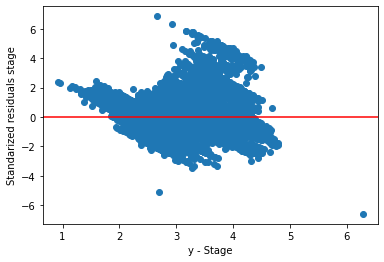

In [184]:
resid = np.array(residuals["Stage"])
norm_resid = resid / resid.std()

plt.scatter([i[0] for i in y_pred], norm_resid)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y - Stage")
plt.ylabel("Standarized residuals stage")

Text(0, 0.5, 'Standarized residuals Discharge')

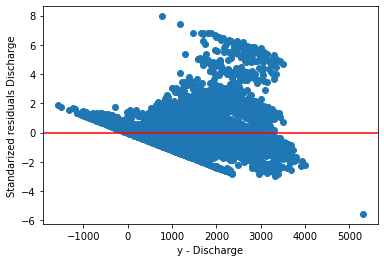

In [185]:
resid = np.array(residuals["Discharge"])
norm_resid = resid / resid.std()

plt.scatter([i[1] for i in y_pred], norm_resid)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y - Discharge")
plt.ylabel("Standarized residuals Discharge")